#  IMPLEMENTACION DE UNA RED NEURONAL

https://arxiv.org/abs/1409.1556

In [ ]:
from google.colab import drive


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Common
import os
import keras
import numpy as np
import tensorflow as tf

# Data
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split

# Data Visualization
import plotly.express as px
import matplotlib.pyplot as plt


# Model
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dropout, Dense, GlobalAvgPool2D

# Callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
# Specify Data Path
file_path = '/content/drive/MyDrive/ML/A_Z Handwritten Data.csv'

# Column Names
names = ['class']
for id in range(1,785):
    names.append(id)

# Load Data
df = pd.read_csv(file_path,header=None, names=names)
df.head()

,class,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
class_mapping = {}
alphabets = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
for i in range(len(alphabets)):
    class_mapping[i] = alphabets[i]
class_mapping



{0: 'A',
 1: 'B',
 2: 'C',
 3: 'D',
 4: 'E',
 5: 'F',
 6: 'G',
 7: 'H',
 8: 'I',
 9: 'J',
 10: 'K',
 11: 'L',
 12: 'M',
 13: 'N',
 14: 'O',
 15: 'P',
 16: 'Q',
 17: 'R',
 18: 'S',
 19: 'T',
 20: 'U',
 21: 'V',
 22: 'W',
 23: 'X',
 24: 'Y',
 25: 'Z'}

In [ ]:
df['class'].map(class_mapping).unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype=object)

In [ ]:
names = df['class'].value_counts().keys().map(class_mapping)
values = df['class'].value_counts()


In [ ]:
# Plot Class Distribution
fig = px.pie(
    names=names,
    values=values,
    height=800,
    title='Class Distribution'
)
fig.update_layout({'title':{'x':0.5}})
fig.show()

In [ ]:
# Plot Class Distribution
fig = px.bar(
    x=names,
    y=values,
    height=800,
    title='Class Distribution'
)
fig.update_layout({'title':{'x':0.5}})
fig.show()

In [ ]:
y_full = df.pop('class')
x_full = df.to_numpy().reshape(-1,28,28, 1)


In [ ]:
splitter = StratifiedShuffleSplit(n_splits=3,test_size=0.2)
for train_ids, test_ids in splitter.split(x_full, y_full):
    X_train_full, y_train_full = x_full[train_ids], y_full[train_ids].to_numpy()
    X_test, y_test = x_full[test_ids], y_full[test_ids].to_numpy()

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.1)

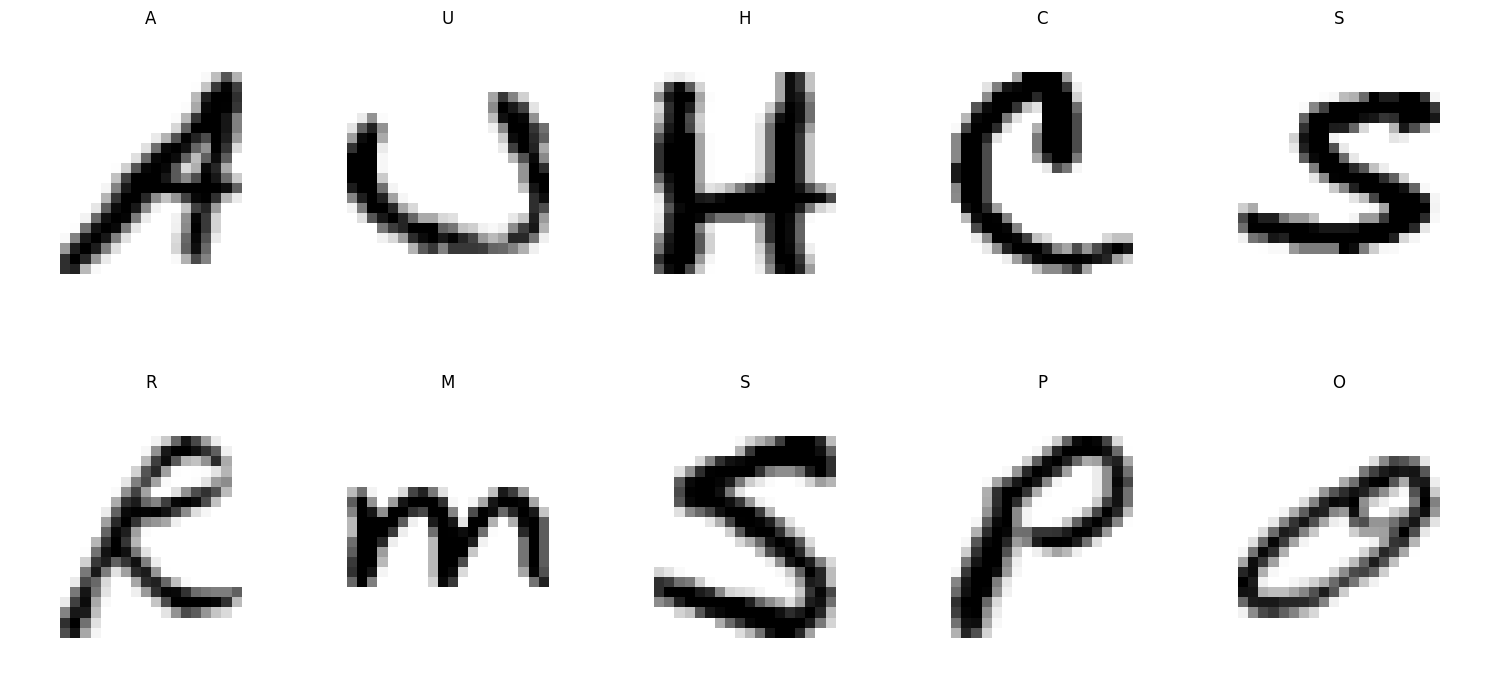

In [ ]:
plt.figure(figsize=(15,8))
for i in range(1, 11):

    id = np.random.randint(len(X_train))
    image, label = tf.squeeze(X_train[id]), class_mapping[int(y_train[id])]

    plt.subplot(2,5,i)
    plt.imshow(image, cmap='binary')
    plt.title(label)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Model Architecture
model = Sequential([
    Conv2D(32, kernel_size=3, strides=2, padding='same', kernel_initializer='he_normal', input_shape=(28, 28, 1)),
    MaxPool2D(),

    BatchNormalization(),
    Conv2D(64, kernel_size=3, padding='same', kernel_initializer='he_normal'),
    BatchNormalization(),
    Conv2D(64, kernel_size=3, padding='same', kernel_initializer='he_normal'),
    MaxPool2D(),

    BatchNormalization(),
    Conv2D(128, kernel_size=3, padding='same', kernel_initializer='he_normal'),
    BatchNormalization(),
    Conv2D(128, kernel_size=3, padding='same', kernel_initializer='he_normal'),
    MaxPool2D(),

    BatchNormalization(),
    Conv2D(256, kernel_size=3, padding='same', kernel_initializer='he_normal'),
    BatchNormalization(),
    Conv2D(256, kernel_size=3, padding='same', kernel_initializer='he_normal'),

    GlobalAvgPool2D(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(26, activation='sigmoid')
])

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 7, 7, 32)          0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 7, 7, 32)          128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 batch_normalization_1 (Bat  (None, 7, 7, 64)          256       
 chNormalization)                                                
                                                        

In [ ]:
model = load_model('/content/drive/MyDrive/ML/ConvModel.h5')


In [ ]:
model.evaluate(X_test,y_test)

2328/2328 [==============================] - 94s 17ms/step - loss: 0.0179 - accuracy: 0.9950


[0.017894266173243523, 0.994952380657196]

1/1 [==============================] - 0s 22ms/step


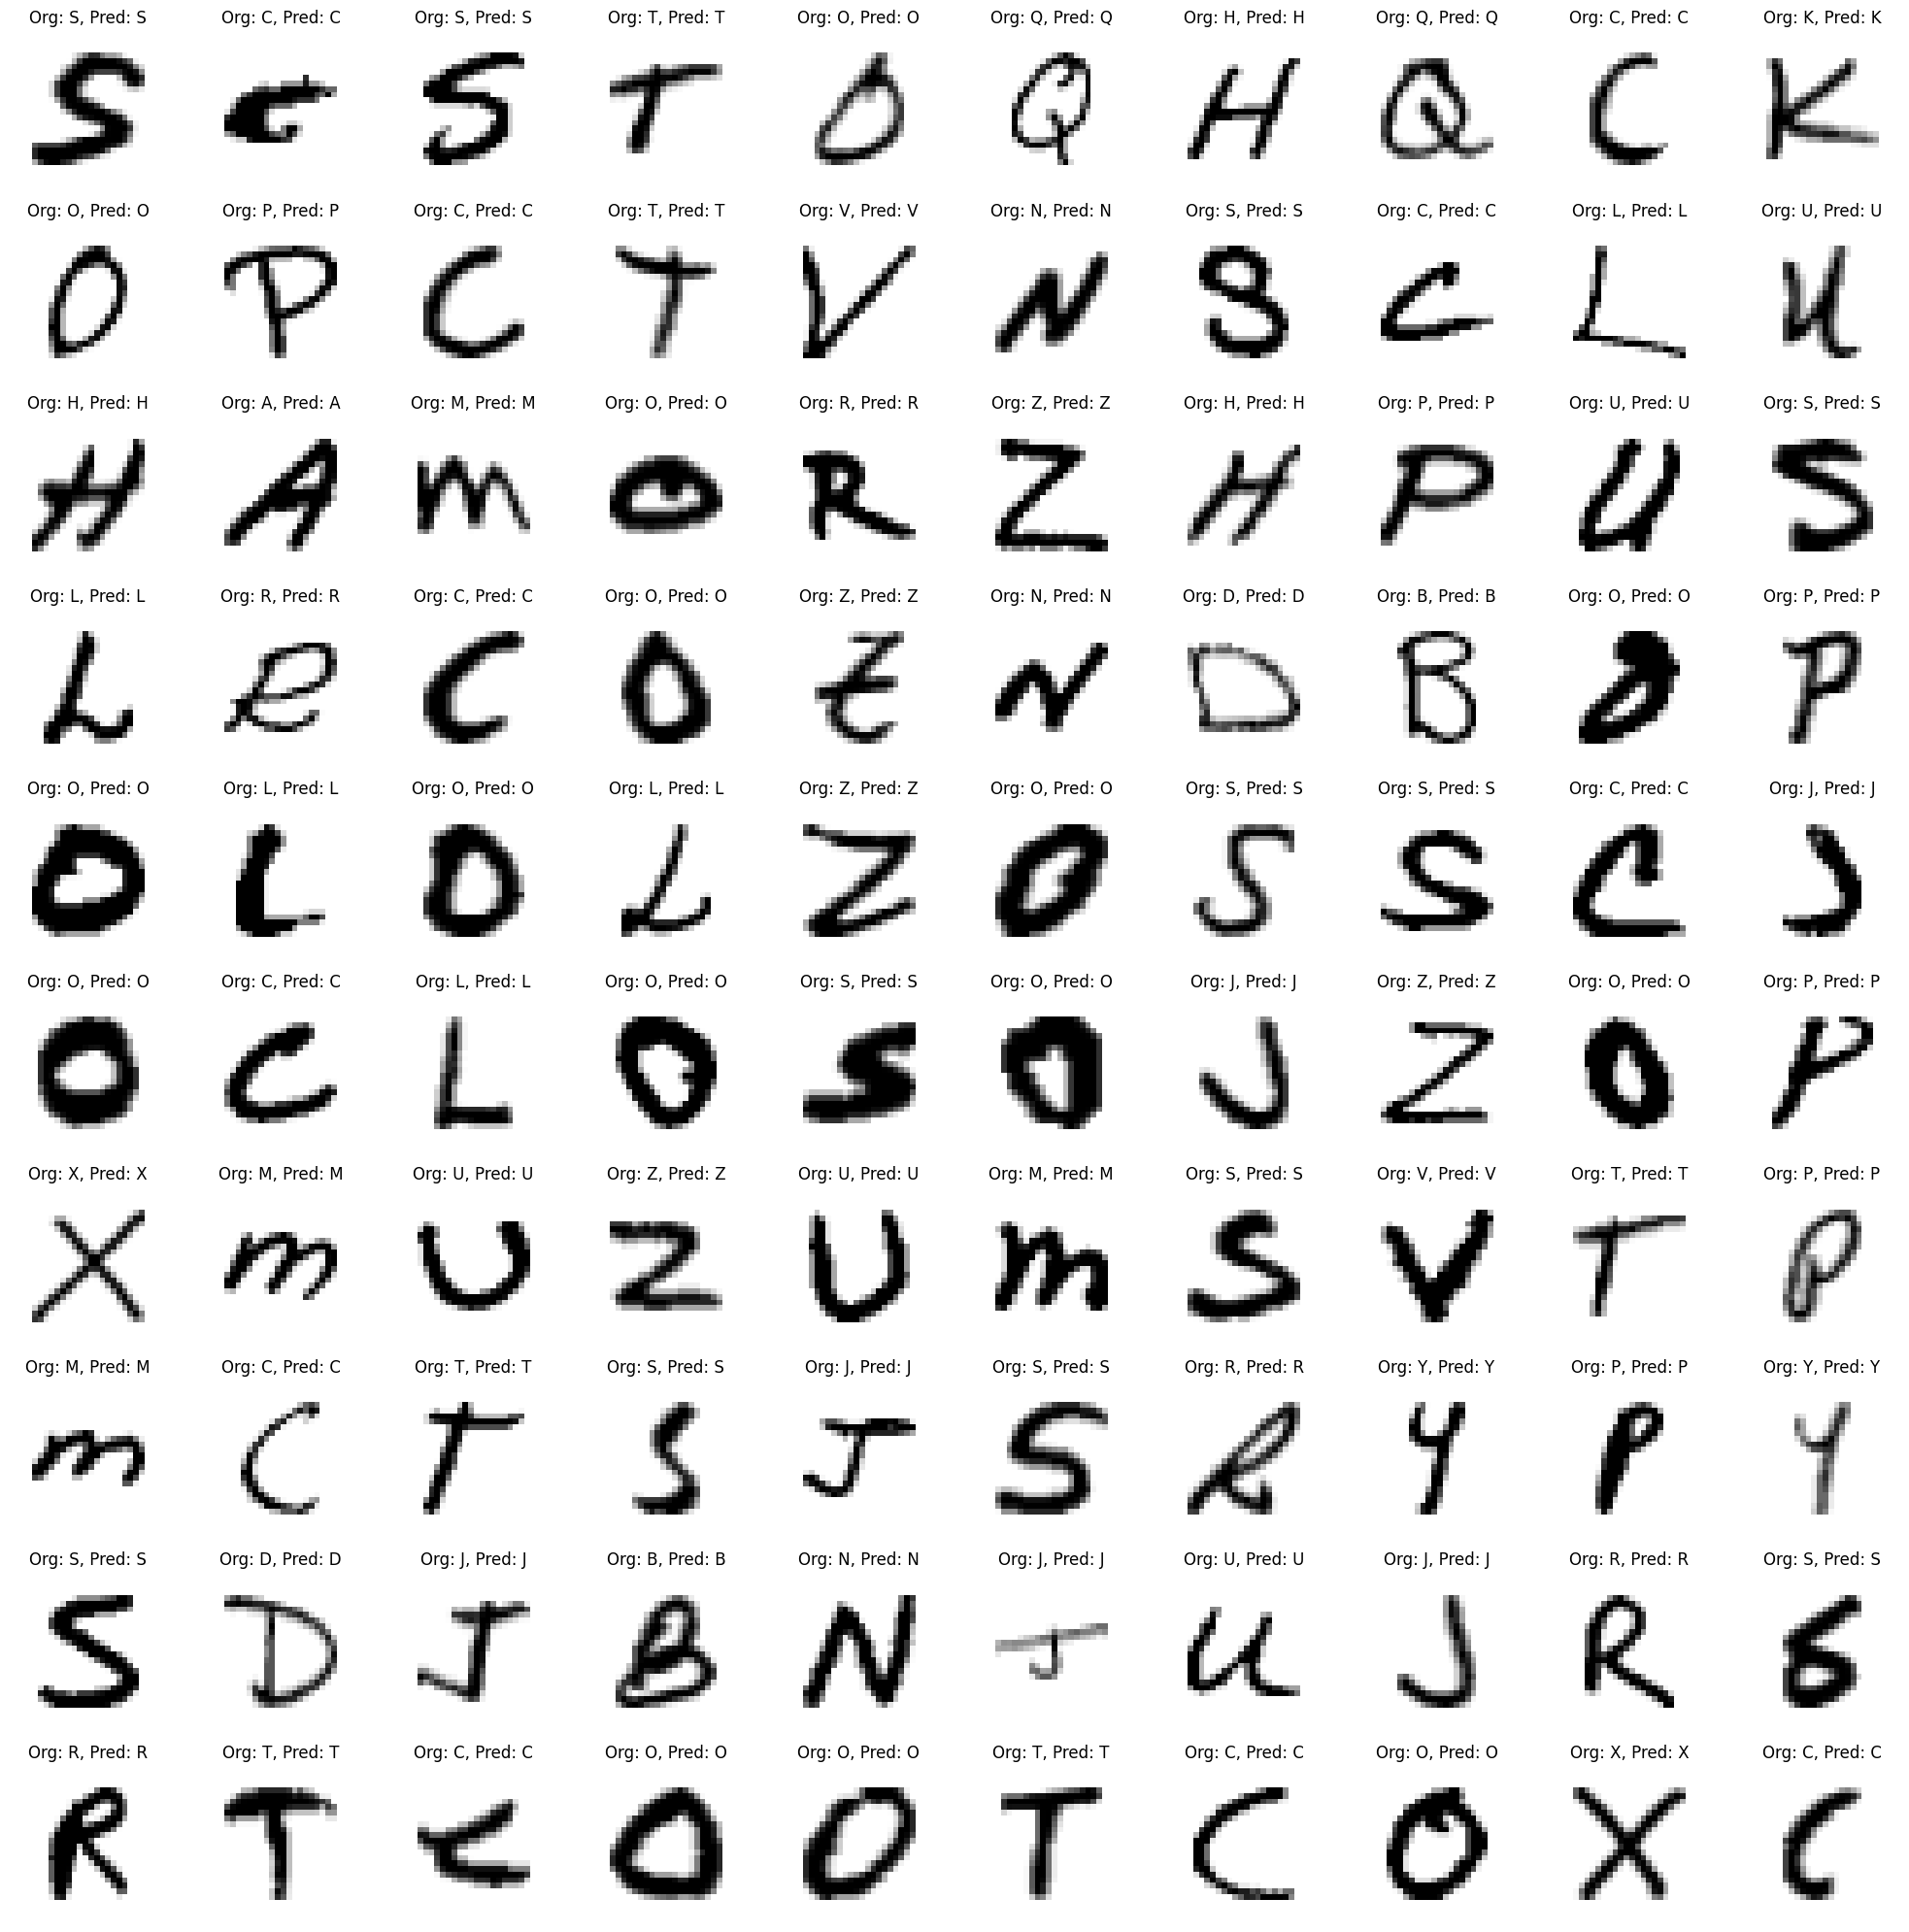

In [ ]:
plt.figure(figsize=(20,20))
for i in range(1, 101):

    id = np.random.randint(len(X_test))
    image, label = X_test[id].reshape(28,28), class_mapping[int(y_test[id])]
    pred = class_mapping[int(np.argmax(model.predict(image.reshape(-1,28,28,1))))]

    plt.subplot(10,10,i)
    plt.imshow(image, cmap='binary')
    plt.title(f"Org: {label}, Pred: {pred}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
pwd


'/content'